<a href="https://colab.research.google.com/github/pavanxk12/Option.strat/blob/main/BollingerB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf

#dfSPY = pd.read_csv("SPY.USUSD_Candlestick_1_D_BID_16.02.2017-21.05.2022.csv")
#dfSPY=yf.download("^GSPC",start='2011-01-05', end='2021-01-05')
dfSPY=yf.download("HDFCBANK.NS",start='2011-01-05', end='2021-01-05')
#dfSPY=yf.download("EURUSD=X",start='2011-01-05', end='2021-01-05')

dfSPY=dfSPY[dfSPY.High!=dfSPY.Low]
dfSPY.reset_index(inplace=True)
dfSPY.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-05,234.970001,234.970001,229.750000,230.820007,209.720917,7825920
1,2011-01-06,231.600006,234.264999,230.899994,232.774994,211.497192,5435090
2,2011-01-07,232.619995,232.619995,226.100006,226.945007,206.200119,7948010
3,2011-01-10,225.604996,227.000000,213.800003,215.225006,195.551422,20070860
4,2011-01-11,217.000000,221.869995,212.500000,214.660004,195.038071,12157590


In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=e9e7ce668ea6580fa85ea4c31043c8a4c1a6f3b517b71dbbffda0f2ae8e6bd03
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas_ta as ta
dfSPY['EMA']=ta.sma(dfSPY.Close, length=200)#sma ema
dfSPY['RSI']=ta.rsi(dfSPY.Close, length=2)
#dfSPY.ta.indicators()
#help(ta.bbands)
my_bbands = ta.bbands(dfSPY.Close, length=20, std=2.5)
my_bbands[0:50]
dfSPY=dfSPY.join(my_bbands)
dfSPY.dropna(inplace=True)
dfSPY.reset_index(inplace=True)
dfSPY

<ipython-input-4-66f321229fed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSPY['EMA']=ta.sma(dfSPY.Close, length=200)#sma ema
<ipython-input-4-66f321229fed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSPY['RSI']=ta.rsi(dfSPY.Close, length=2)


,index,Date,Open,High,Low,Close,Adj Close,Volume,EMA,RSI,BBL_20_2.5,BBM_20_2.5,BBU_20_2.5,BBB_20_2.5,BBP_20_2.5
0,199,2011-10-24,246.375000,248.500000,241.475006,242.175003,221.562332,4871546,230.015900,30.536468,214.759487,233.257500,251.755513,15.860594,0.741039
1,200,2011-10-25,243.925003,245.375000,224.274994,234.000000,214.083160,41315010,230.031800,5.053207,215.815164,233.705000,251.594835,15.309759,0.508245
2,201,2011-10-28,243.000000,247.250000,239.875000,241.324997,220.784683,9019224,230.074550,61.952761,216.225316,234.334999,252.444682,15.456234,0.692991
3,202,2011-10-31,241.500000,245.875000,238.574997,245.000000,224.146896,6425708,230.164825,76.240143,216.410400,235.134999,253.859599,15.926680,0.763424
4,203,2011-11-01,242.550003,246.500000,240.000000,241.149994,220.624573,6649758,230.294450,42.668587,216.417667,235.427499,254.437330,16.149202,0.650514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,2456,2020-12-29,1421.050049,1434.750000,1420.000000,1427.199951,1388.790405,7247673,1099.653750,94.322840,1342.022685,1395.664996,1449.307308,7.686990,0.793937
2258,2457,2020-12-30,1439.900024,1439.900024,1413.000000,1432.500000,1393.947998,8108363,1101.709750,95.805149,1342.156602,1395.624994,1449.093386,7.662286,0.844830
2259,2458,2020-12-31,1435.000000,1444.000000,1425.050049,1436.300049,1397.645630,11072875,1103.542250,96.947888,1339.452683,1397.092499,1454.732314,8.251396,0.840108
2260,2459,2021-01-01,1440.000000,1443.000000,1420.599976,1425.050049,1386.698486,4405469,1105.670000,37.102685,1341.114034,1399.485004,1457.855973,8.341778,0.718988


In [ ]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal'] = emasignal

addemasignal(dfSPY, 6)

In [ ]:
def addorderslimit(df, percent):
    ordersignal=[0]*len(df)
    for i in range(1, len(df)): #EMASignal of previous candle!!! modified!!!
        if df.EMASignal[i]==2 and df.Close[i]<=df['BBL_20_2.5'][i]:# and df.RSI[i]<=100: #Added RSI condition to avoid direct close condition
            ordersignal[i]=df.Close[i]-df.Close[i]*percent
        elif df.EMASignal[i]==1 and df.Close[i]>=df['BBU_20_2.5'][i]:# and df.RSI[i]>=0:
            ordersignal[i]=df.Close[i]+df.Close[i]*percent
    df['ordersignal']=ordersignal

addorderslimit(dfSPY, 0.00)

In [ ]:
dfSPY[dfSPY.ordersignal!=0]

,index,Date,Open,High,Low,Close,Adj Close,Volume,EMA,RSI,BBL_20_2.5,BBM_20_2.5,BBU_20_2.5,BBB_20_2.5,BBP_20_2.5,EMASignal,ordersignal
837,1036,2015-03-26,513.450012,516.099976,501.049988,503.475006,472.095673,17900310,458.759001,1.215631,505.027703,527.046254,549.064805,8.355453,-0.035259,2,503.475006
932,1131,2015-08-12,544.200012,547.450012,533.849976,535.224976,505.639069,3002870,507.264251,3.686632,536.582807,550.651248,564.719689,5.109746,-0.048258,2,535.224976
1219,1418,2016-10-17,632.750000,633.200012,616.375000,618.849976,589.439941,2567680,571.101499,1.766927,621.897374,642.521246,663.145119,6.419670,-0.073880,2,618.849976
1241,1440,2016-11-18,618.000000,618.000000,604.599976,605.700012,576.914917,3439950,581.860124,2.862404,607.685530,626.128754,644.571977,5.891192,-0.053828,2,605.700012
1242,1441,2016-11-21,609.750000,609.750000,594.174988,599.349976,570.866760,2776260,582.253999,1.601887,601.239129,624.708752,648.178376,7.513781,-0.040247,2,599.349976
1693,1892,2018-09-11,1023.150024,1024.000000,997.075012,1000.200012,965.122375,9093268,988.286876,4.257118,1006.059455,1034.507504,1062.955554,5.499825,-0.102985,2,1000.200012
1786,1985,2019-01-29,1039.125000,1041.500000,1026.500000,1028.800049,992.719299,7381394,1025.104125,0.939591,1032.142212,1056.357489,1080.572766,4.584675,-0.069009,2,1028.800049
1901,2100,2019-07-22,1172.500000,1174.925049,1140.625000,1148.625000,1115.230713,11085648,1095.058747,4.527243,1150.212397,1211.894983,1273.577569,10.179527,-0.012867,2,1148.625000
1902,2101,2019-07-23,1147.250000,1147.250000,1121.025024,1131.750000,1098.846191,13901432,1095.796997,2.721015,1132.243410,1207.764984,1283.286558,12.506005,-0.003267,2,1131.750000


# Visualization

In [ ]:
import numpy as np
def pointposbreak(x):
    if x['ordersignal']!=0:
        return x['ordersignal']
    else:
        return np.nan
dfSPY['pointposbreak'] = dfSPY.apply(lambda row: pointposbreak(row), axis=1)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

dfpl = dfSPY[1000:1250].copy()
#dfpl=dfpl.drop(columns=['level_0'])#!!!!!!!!!!
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),
                go.Scatter(x=dfpl.index, y=dfpl.EMA, line=dict(color='orange', width=2), name="EMA"),
                go.Scatter(x=dfpl.index, y=dfpl['BBL_20_2.5'], line=dict(color='blue', width=1), name="BBL_20_2.5"),
                go.Scatter(x=dfpl.index, y=dfpl['BBU_20_2.5'], line=dict(color='blue', width=1), name="BBU_20_2.5")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointposbreak'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="Signal")
fig.show()

In [ ]:
dfpl = dfSPY[:].copy()
def SIGNAL():
    return dfpl.ordersignal

In [ ]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=a1e9e48bf05acdc44a2fa86463adc144aa8dda791e002a3d061a57b27dd21917
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [ ]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    initsize = 0.99
    ordertime=[]
    def init(self):
        super().init()
        self.signal = self.I(SIGNAL)

    def next(self):
        super().next()

        for j in range(0, len(self.orders)):
            #print('!!!!!!!!!!!!!!!!!!!', self.data.index[-1])
            if self.data.index[-1]-self.ordertime[0]>5:#days max to fulfill the order!!!
                #print('----------------------')
                #print(self.orders)
                #print(self.ordertime)
                self.orders[0].cancel()
                self.ordertime.pop(0)

        if len(self.trades)>0:
            #print(self.data.index[-1], self.trades)
            if self.data.index[-1]-self.trades[-1].entry_time>=10:
                self.trades[-1].close()
                #print(self.data.index[-1], self.trades[-1].entry_time)

            if self.trades[-1].is_long and self.data.RSI[-1]>=50:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.data.RSI[-1]<=50:
                self.trades[-1].close()

        if self.signal!=0 and len(self.trades)==0 and self.data.EMASignal==2:
            #Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)
            #Add new replacement order
            self.buy(sl=self.signal/2, limit=self.signal, size=self.initsize)
            self.ordertime.append(self.data.index[-1])

        elif self.signal!=0 and len(self.trades)==0 and self.data.EMASignal==1:
            #Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)
            #Add new replacement order
            self.sell(sl=self.signal*2, limit=self.signal, size=self.initsize)
            self.ordertime.append(self.data.index[-1])

bt = Backtest(dfpl, MyStrat, cash=10000, margin=1/10, commission=.00)
stat = bt.run()
stat

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.

<ipython-input-13-c979baf46d14>:52: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    2261.0
Duration                               2261.0
Exposure Time [%]                    1.193634
Equity Final [$]                  6356.855164
Equity Peak [$]                  12884.208984
Return [%]                         -36.431448
Buy & Hold Return [%]              484.701138
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -54.791713
Avg. Drawdown [%]                  -54.791713
Max. Drawdown Duration                 1327.0
Avg. Drawdown Duration                 1327.0
# Trades                                  5.0
Win Rate [%]                             60.0
Best Trade [%]                       2.671783
Worst Trade [%]                     -4.554369
Avg. Trade [%]                    

In [ ]:
bt.plot(show_legend=False)

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1326', ...)

In [ ]:
stat._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,184,933,935,535.224976,549.525024,2631.208984,0.026718,933,935,2
1,206,1242,1247,605.700012,590.125000,-3208.452515,-0.025714,1242,1247,5
2,93,1694,1696,1000.200012,1010.650024,971.851135,0.010448,1694,1696,2
3,100,1787,1789,1028.625000,1039.974976,1134.997559,0.011034,1787,1789,2
4,99,1902,1913,1147.250000,1095.000000,-5172.750000,-0.045544,1902,1913,11


In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=77902a3885884b2b3998d1ce07d2e98dbd33b24e1ee53159a484aa930b058fb8
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import yfinance as yf
start = '2012-01-01'
end = '2022-12-21'
stock = 'HDFCBANK.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


Long Win Rate: 0.6666666666666666
Long Average: 0.008881432801797658
Short Win Rate: 0.0
Short Average: -0.14143145582487168
Time In Market: 0.38743068391866914


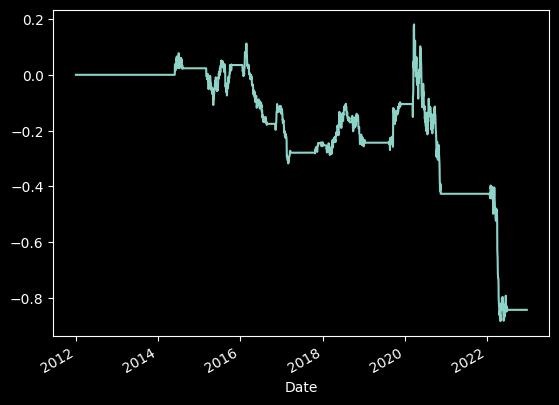

In [ ]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt

def plot_two_axes(series1, *ex_series):
    plt.style.use('dark_background')
    ax = series1.plot(color='green')
    ax2 = ax.twinx()
    for i, series in enumerate(ex_series):
        series.plot(ax=ax2, alpha=0.5)

def hawkes_process(data: pd.Series, kappa: float):
    assert(kappa > 0.0)
    alpha = np.exp(-kappa)
    arr = data.to_numpy()
    output = np.zeros(len(data))
    output[:] = np.nan
    for i in range(1, len(data)):
        if np.isnan(output[i - 1]):
            output[i] = arr[i]
        else:
            output[i] = output[i - 1] * alpha + arr[i]
    return pd.Series(output, index=data.index) * kappa

def vol_signal(close: pd.Series, vol_hawkes: pd.Series, lookback:int):
    signal = np.zeros(len(close))
    q05 = vol_hawkes.rolling(lookback).quantile(0.05)
    q95 = vol_hawkes.rolling(lookback).quantile(0.95)

    last_below = -1
    curr_sig = 0

    for i in range(len(signal)):
        if vol_hawkes.iloc[i] < q05.iloc[i]:
            last_below = i
            curr_sig = 0

        if vol_hawkes.iloc[i] > q95.iloc[i] \
           and vol_hawkes.iloc[i - 1] <= q95.iloc[i - 1] \
           and last_below > 0 :

            change = close.iloc[i] - close.iloc[last_below]
            if change > 0.0:
                curr_sig = 1
            else:
                curr_sig = -1
        signal[i] = curr_sig

    return signal

def get_trades_from_signal(data: pd.DataFrame, signal: np.array):
    # Gets trade entry and exit times from a signal
    # that has values of -1, 0, 1. Denoting short,flat,and long.
    # No position sizing.

    long_trades = []
    short_trades = []

    close_arr = data['Close'].to_numpy()
    last_sig = 0.0
    open_trade = None
    idx = data.index
    for i in range(len(data)):
        if signal[i] == 1.0 and last_sig != 1.0: # Long entry
            if open_trade is not None:
                open_trade[2] = idx[i]
                open_trade[3] = close_arr[i]
                short_trades.append(open_trade)

            open_trade = [idx[i], close_arr[i], -1, np.nan]
        if signal[i] == -1.0  and last_sig != -1.0: # Short entry
            if open_trade is not None:
                open_trade[2] = idx[i]
                open_trade[3] = close_arr[i]
                long_trades.append(open_trade)

            open_trade = [idx[i], close_arr[i], -1, np.nan]

        if signal[i] == 0.0 and last_sig == -1.0: # Short exit
            open_trade[2] = idx[i]
            open_trade[3] = close_arr[i]
            short_trades.append(open_trade)
            open_trade = None

        if signal[i] == 0.0  and last_sig == 1.0: # Long exit
            open_trade[2] = idx[i]
            open_trade[3] = close_arr[i]
            long_trades.append(open_trade)
            open_trade = None

        last_sig = signal[i]

    long_trades = pd.DataFrame(long_trades, columns=['entry_time', 'entry_price', 'exit_time', 'exit_price'])
    short_trades = pd.DataFrame(short_trades, columns=['entry_time', 'entry_price', 'exit_time', 'exit_price'])

    long_trades['percent'] = (long_trades['exit_price'] - long_trades['entry_price']) / long_trades['entry_price']
    short_trades['percent'] = -1 * (short_trades['exit_price'] - short_trades['entry_price']) / short_trades['entry_price']
    long_trades = long_trades.set_index('entry_time')
    short_trades = short_trades.set_index('entry_time')
    return long_trades, short_trades


# data = pd.read_csv('HDFCBANK.csv')  # Assuming you have the HDFC Bank data in 'HDFCBANK.csv'
# data['Date'] = pd.to_datetime(data['Date'])
# data = data.set_index('Date')

# Normalize volume
norm_lookback = 336
data['ATR'] = ta.atr(np.log(data['High']), np.log(data['Low']), np.log(data['Close']), norm_lookback)
data['norm_range'] = (np.log(data['High']) - np.log(data['Low'])) / data['ATR']

data['v_hawk'] = hawkes_process(data['norm_range'], 0.1)
data['sig'] = vol_signal(data['Close'], data['v_hawk'], 168)

data['next_return'] = np.log(data['Close']).diff().shift(-1)
data['signal_return'] = data['sig'] * data['next_return']

plt.style.use('dark_background')
data['signal_return'].cumsum().plot()

long_trades, short_trades = get_trades_from_signal(data, data['sig'].to_numpy())
long_win_rate = len(long_trades[long_trades['percent'] > 0]) / len(long_trades)
short_win_rate = len(short_trades[short_trades['percent'] > 0]) / len(short_trades)
long_average = long_trades['percent'].mean()
short_average = short_trades['percent'].mean()
time_in_market = len(data[data['sig'] != 0.0]) / len(data)

print("Long Win Rate:", long_win_rate)
print("Long Average:", long_average)
print("Short Win Rate:", short_win_rate)
print("Short Average:", short_average)
print("Time In Market:", time_in_market)


In [ ]:
data.head

AttributeError: module 'pandas' has no attribute 'head'